In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df1 = pd.read_csv('성적을 부탁해 티쳐스.csv')
columns_to_convert = ['view_count', 'like_count']
df1[columns_to_convert] = df1[columns_to_convert].apply(pd.to_numeric, errors='coerce')

channels_of_interest = ['play 채널A', '채널아하: 채널A Health & Asset', '채널에이드: 채널A Drama & Enjoy','채널A WORLD']
df1_filtered = df1[df1['channel_name'].isin(channels_of_interest)]
df1_filtered = df1_filtered.reset_index(drop=True)
df1_filtered.count()

title           180
view_count      180
like_count      180
channel_name    180
published       180
dtype: int64

### 티처스 통계값

In [62]:
min_view_count = df1_filtered['view_count'].min()
mean_view_count = df1_filtered['view_count'].mean()
max_view_count = df1_filtered['view_count'].max()

# 결과를 데이터프레임으로 변환
results = {
    'Statistic': ['Minimum', 'Mean', 'Maximum'],
    'View Count': [min_view_count, mean_view_count, max_view_count]
}

results_df = pd.DataFrame(results)

# 막대 그래프 그리기
# plt.figure(figsize=(10, 6))  # 그래프 크기 조정
# plt.bar(results_df['Statistic'], results_df['View Count'], color=['blue', 'green', 'red'])

# 제목과 레이블 추가
# plt.title('View Count Statistics')
# plt.xlabel('Statistic')
# plt.ylabel('View Count')
# plt.savefig('티처스 통계값')
# 그래프 출력
# plt.show()

### 유독 높은 조회수 1개 영상 제거

In [64]:
min_view_count_no_outlier = df1_filtered_no_outlier['view_count'].min()
mean_view_count_no_outlier = df1_filtered_no_outlier['view_count'].mean()
max_view_count_no_outlier = df1_filtered_no_outlier['view_count'].max()

# 결과 출력
print(f"Minimum view count (excluding maximum): {min_view_count_no_outlier}")
print(f"Mean view count (excluding maximum): {mean_view_count_no_outlier}")
print(f"Maximum view count (excluding maximum): {max_view_count_no_outlier}")

Minimum view count (excluding maximum): 12803
Mean view count (excluding maximum): 489775.4245810056
Maximum view count (excluding maximum): 3317586


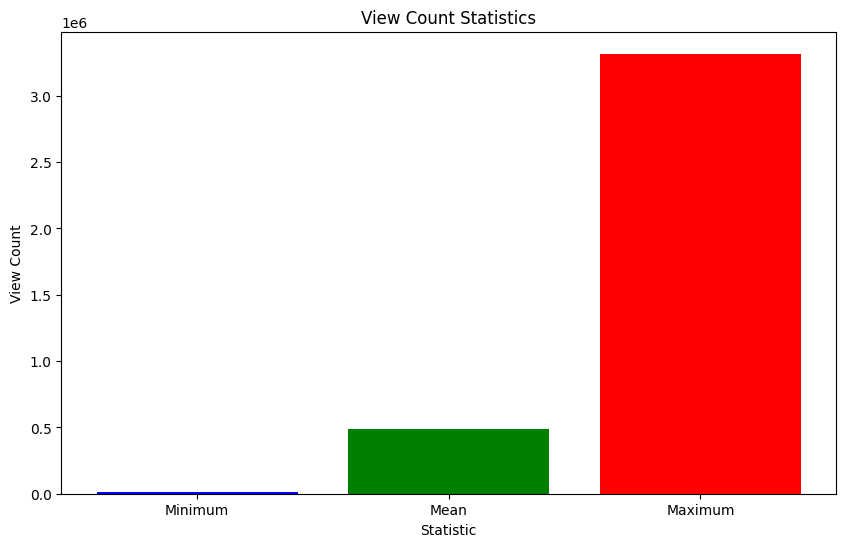

In [67]:
max_view_count = df1_filtered['view_count'].max()

# 가장 큰 'view_count' 값을 가진 행 제거
df1_filtered_no_outlier = df1_filtered[df1_filtered['view_count'] != max_view_count]

min_view_count = df1_filtered_no_outlier['view_count'].min()
mean_view_count = df1_filtered_no_outlier['view_count'].mean()
max_view_count = df1_filtered_no_outlier['view_count'].max()

# 결과를 데이터프레임으로 변환
results = {
    'Statistic': ['Minimum', 'Mean', 'Maximum'],
    'View Count': [min_view_count, mean_view_count, max_view_count]
}

results_df = pd.DataFrame(results)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
plt.bar(results_df['Statistic'], results_df['View Count'], color=['blue', 'green', 'red'])

# 제목과 레이블 추가
plt.title('View Count Statistics')
plt.xlabel('Statistic')
plt.ylabel('View Count')
# plt.savefig('티처스 통계값(제거)')
# 그래프 출력
plt.show()

### box plot

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_5820\1773333534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1_filtered_no_outlier, y='view_count', palette='coolwarm')


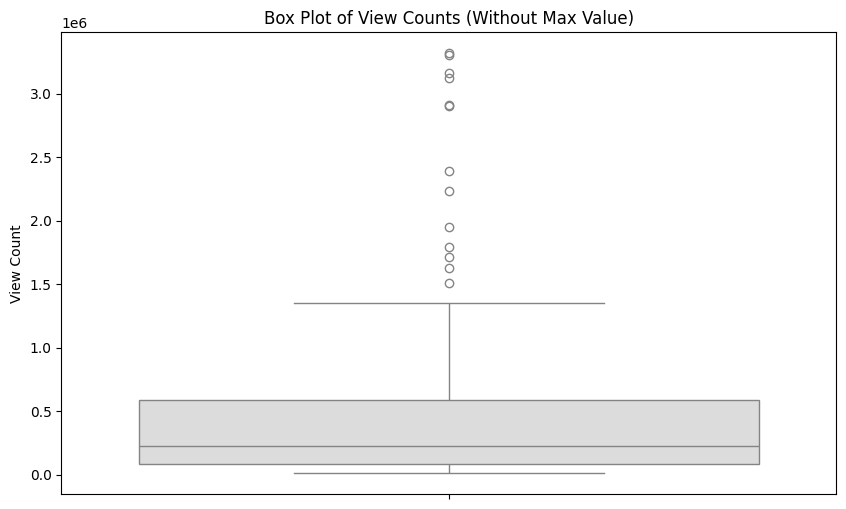

In [51]:
# 과하게 많은 조회수 1개 제거

# 가장 큰 'view_count' 값 찾기
max_view_count = df1_filtered['view_count'].max()

# 가장 큰 'view_count' 값을 가진 행 제거
df1_filtered_no_outlier = df1_filtered[df1_filtered['view_count'] != max_view_count]

# box plot 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
sns.boxplot(data=df1_filtered_no_outlier, y='view_count', palette='coolwarm')

# 제목과 레이블 추가
plt.title('Box Plot of View Counts (Without Max Value)')
plt.ylabel('View Count')

# plt.savefig('티처스boxplot')

# 그래프 출력
plt.show()

### 티처스 분위값

In [20]:
# 1분위값 (25th percentile)과 3분위값 (75th percentile) 계산
first_quartile = df1_filtered['view_count'].quantile(0.25)
median = df1_filtered['view_count'].median()
third_quartile = df1_filtered['view_count'].quantile(0.75)

# 결과 출력
print(f"1st Quartile (25th percentile): {first_quartile}")
print(f"Median (50th percentile): {median}")
print(f"3rd Quartile (75th percentile): {third_quartile}")

1st Quartile (25th percentile): 83712.0
Median (50th percentile): 224896.5
3rd Quartile (75th percentile): 593065.25


In [5]:
# 가장 큰 'view_count' 값 찾기
max_view_count = df1_filtered['view_count'].max()

# 가장 큰 'view_count' 값을 가진 행 제거
df1_filtered_no_max = df1_filtered[df1_filtered['view_count'] != max_view_count]

# 1분위값 (25th percentile), 중앙값 (50th percentile), 3분위값 (75th percentile) 계산
first_quartile = df1_filtered_no_max['view_count'].quantile(0.25)
median = df1_filtered_no_max['view_count'].median()
third_quartile = df1_filtered_no_max['view_count'].quantile(0.75)

# 결과 출력
print(f"1st Quartile (25th percentile) after removing max value: {first_quartile}")
print(f"Median (50th percentile) after removing max value: {median}")
print(f"3rd Quartile (75th percentile) after removing max value: {third_quartile}")


1st Quartile (25th percentile) after removing max value: 83140.0
Median (50th percentile) after removing max value: 222991.0
3rd Quartile (75th percentile) after removing max value: 591854.5


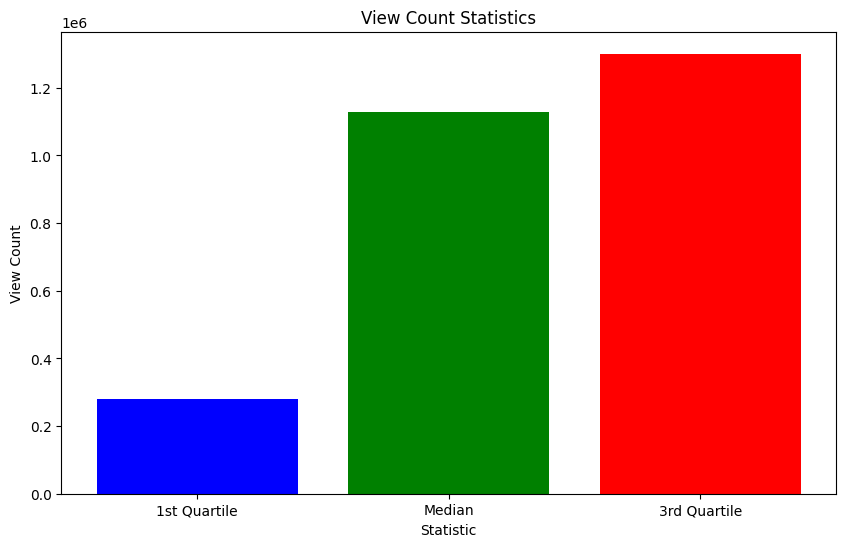

In [38]:
results = {
    'Statistic': ['1st Quartile', 'Median', '3rd Quartile'],
    'View Count': [first_quartile, median, third_quartile]
}

results_df = pd.DataFrame(results)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
plt.bar(results_df['Statistic'], results_df['View Count'], color=['blue', 'green', 'red'])

# 제목과 레이블 추가
plt.title('View Count Statistics')
plt.xlabel('Statistic')
plt.ylabel('View Count')

# plt.savefig('티처스 분위값')
# 그래프 출력
plt.show()

### 채널별

In [27]:
v1 = df1_filtered['channel_name'] == 'play 채널A'
vsort_df1 = df1_filtered.loc[v1].sort_values(by='view_count', ascending=False)

v2 = df1_filtered['channel_name'] == '채널아하: 채널A Health & Asset'
vsort_df2 = df1_filtered.loc[v2].sort_values(by='view_count', ascending=False)

v3 = df1_filtered['channel_name'] == '채널에이드: 채널A Drama & Enjoy'
vsort_df3 = df1_filtered.loc[v3].sort_values(by='view_count', ascending=False)

v4 = df1_filtered['channel_name'] == '채널A WORLD'
vsort_df4 = df1_filtered.loc[v4].sort_values(by='view_count', ascending=False)

### 채널별 분위값

In [28]:
dataframes = [vsort_df1, vsort_df2, vsort_df3, vsort_df4]
names = ['vsort_df1', 'vsort_df2', 'vsort_df3', 'vsort_df4']

# 각 데이터프레임에 대해 1분위값, 중앙값, 3분위값 계산 및 출력
for df, name in zip(dataframes, names):
    first_quartile = df['view_count'].quantile(0.25)
    median = df['view_count'].median()
    third_quartile = df['view_count'].quantile(0.75)
    
    # 결과 출력
    print(f"Results for {name}:")
    print(f"  1st Quartile (25th percentile): {first_quartile}")
    print(f"  Median (50th percentile): {median}")
    print(f"  3rd Quartile (75th percentile): {third_quartile}")
    print()  # 줄바꿈

Results for vsort_df1:
  1st Quartile (25th percentile): 67674.25
  Median (50th percentile): 146879.0
  3rd Quartile (75th percentile): 408324.25

Results for vsort_df2:
  1st Quartile (25th percentile): 91729.0
  Median (50th percentile): 177403.0
  3rd Quartile (75th percentile): 356669.25

Results for vsort_df3:
  1st Quartile (25th percentile): 529031.0
  Median (50th percentile): 726154.0
  3rd Quartile (75th percentile): 1712437.0

Results for vsort_df4:
  1st Quartile (25th percentile): 279186.0
  Median (50th percentile): 1127224.0
  3rd Quartile (75th percentile): 1300790.0



### 채널별 분위값

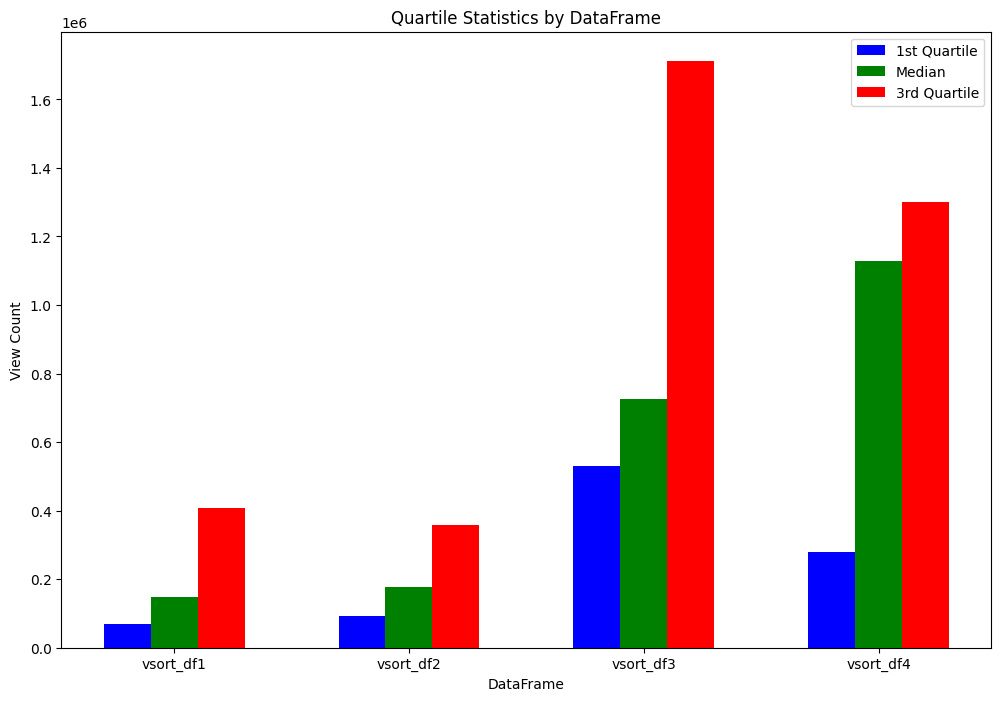

In [37]:
dataframes = [vsort_df1, vsort_df2, vsort_df3, vsort_df4]
names = ['vsort_df1', 'vsort_df2', 'vsort_df3', 'vsort_df4']

# 분위값 계산 및 저장
results = {'DataFrame': [], '1st Quartile': [], 'Median': [], '3rd Quartile': []}

for df, name in zip(dataframes, names):
    first_quartile = df['view_count'].quantile(0.25)
    median = df['view_count'].median()
    third_quartile = df['view_count'].quantile(0.75)
    
    results['DataFrame'].append(name)
    results['1st Quartile'].append(first_quartile)
    results['Median'].append(median)
    results['3rd Quartile'].append(third_quartile)

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 분위값에 대해 막대 그래프 그리기
x = results_df['DataFrame']
bar_width = 0.2  # 막대의 너비
bar_positions = range(len(x))

plt.bar([p - bar_width for p in bar_positions], results_df['1st Quartile'], width=bar_width, label='1st Quartile', color='blue')
plt.bar(bar_positions, results_df['Median'], width=bar_width, label='Median', color='green')
plt.bar([p + bar_width for p in bar_positions], results_df['3rd Quartile'], width=bar_width, label='3rd Quartile', color='red')

# 제목과 레이블 추가
plt.title('Quartile Statistics by DataFrame')
plt.xlabel('DataFrame')
plt.ylabel('View Count')
plt.xticks(bar_positions, x)  # x축 레이블 설정
plt.legend()

# plt.savefig('채널별 분위값')
# 그래프 출력
plt.show()

### 채널별 통계값

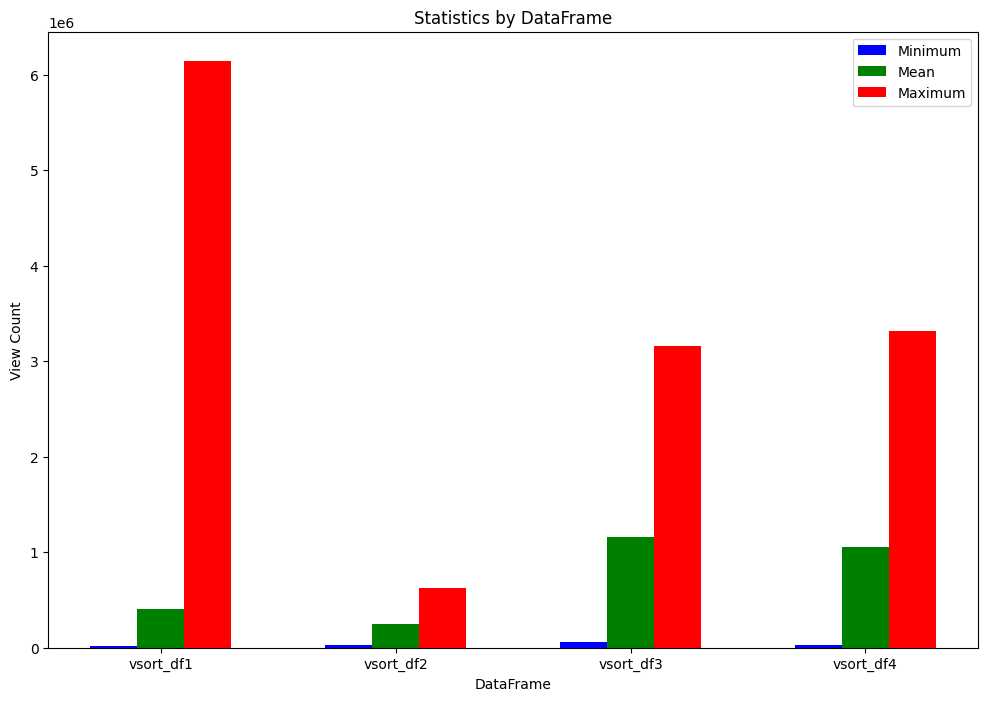

In [36]:
results = {'DataFrame': [], 'Minimum': [], 'Mean': [], 'Maximum': []}

for df, name in zip(dataframes, names):
    min_value = df['view_count'].min()
    mean_value = df['view_count'].mean()
    max_value = df['view_count'].max()
    
    results['DataFrame'].append(name)
    results['Minimum'].append(min_value)
    results['Mean'].append(mean_value)
    results['Maximum'].append(max_value)

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 통계값에 대해 막대 그래프 그리기
x = results_df['DataFrame']
bar_width = 0.2  # 막대의 너비
bar_positions = range(len(x))

plt.bar([p - bar_width for p in bar_positions], results_df['Minimum'], width=bar_width, label='Minimum', color='blue')
plt.bar(bar_positions, results_df['Mean'], width=bar_width, label='Mean', color='green')
plt.bar([p + bar_width for p in bar_positions], results_df['Maximum'], width=bar_width, label='Maximum', color='red')

# 제목과 레이블 추가
plt.title('Statistics by DataFrame')
plt.xlabel('DataFrame')
plt.ylabel('View Count')
plt.xticks(bar_positions, x)  # x축 레이블 설정
plt.legend()

# 그래프 저장
# plt.savefig('채널별_통계값.png')

# 그래프 출력
plt.show()

### 채널별 최솟값

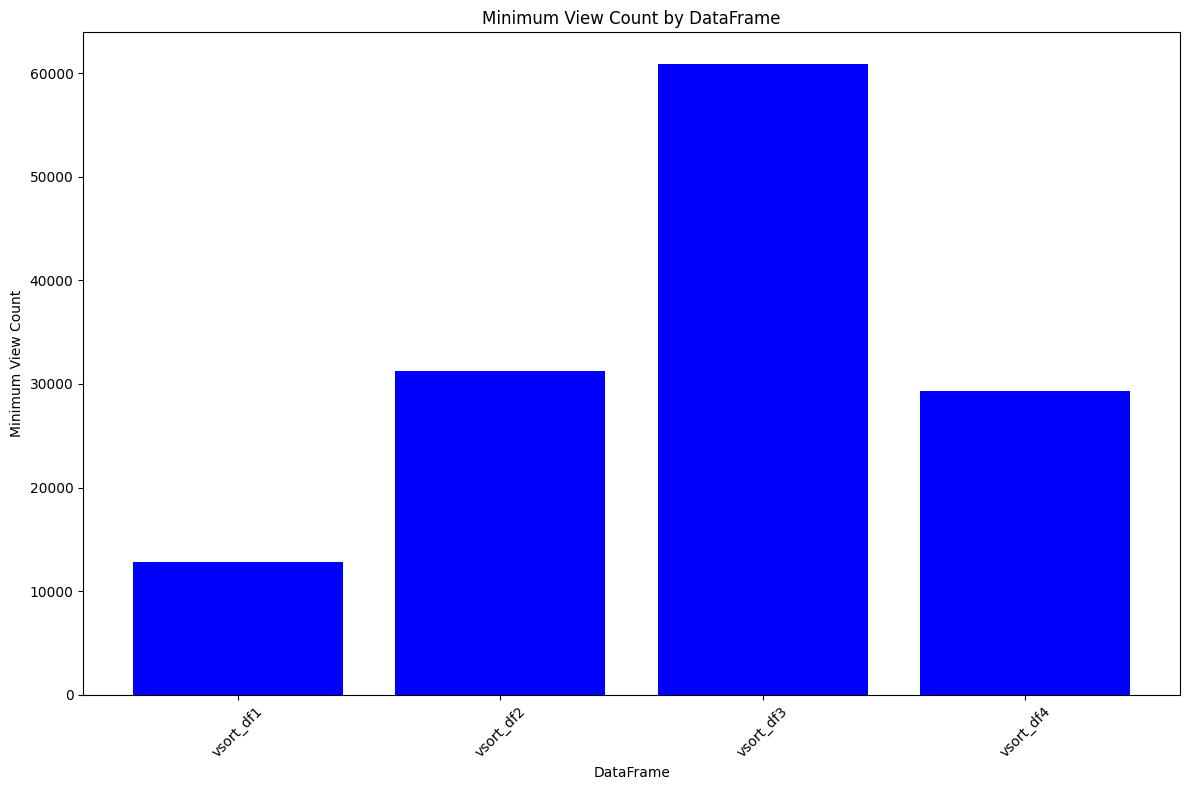

In [46]:
dataframes = [vsort_df1, vsort_df2, vsort_df3, vsort_df4]
names = ['vsort_df1', 'vsort_df2', 'vsort_df3', 'vsort_df4']

# 최솟값 계산 및 저장
results = {'DataFrame': [], 'Minimum': []}

for df, name in zip(dataframes, names):
    min_value = df['view_count'].min()
    
    results['DataFrame'].append(name)
    results['Minimum'].append(min_value)

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))

# 막대 그래프 그리기
plt.bar(results_df['DataFrame'], results_df['Minimum'], color='blue')

# 제목과 레이블 추가
plt.title('Minimum View Count by DataFrame')
plt.xlabel('DataFrame')
plt.ylabel('Minimum View Count')

# plt.savefig('채널별_최솟값.png')

# 그래프 출력
plt.xticks(rotation=45)  # x축 레이블이 겹치지 않도록 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

### 채널별 평균

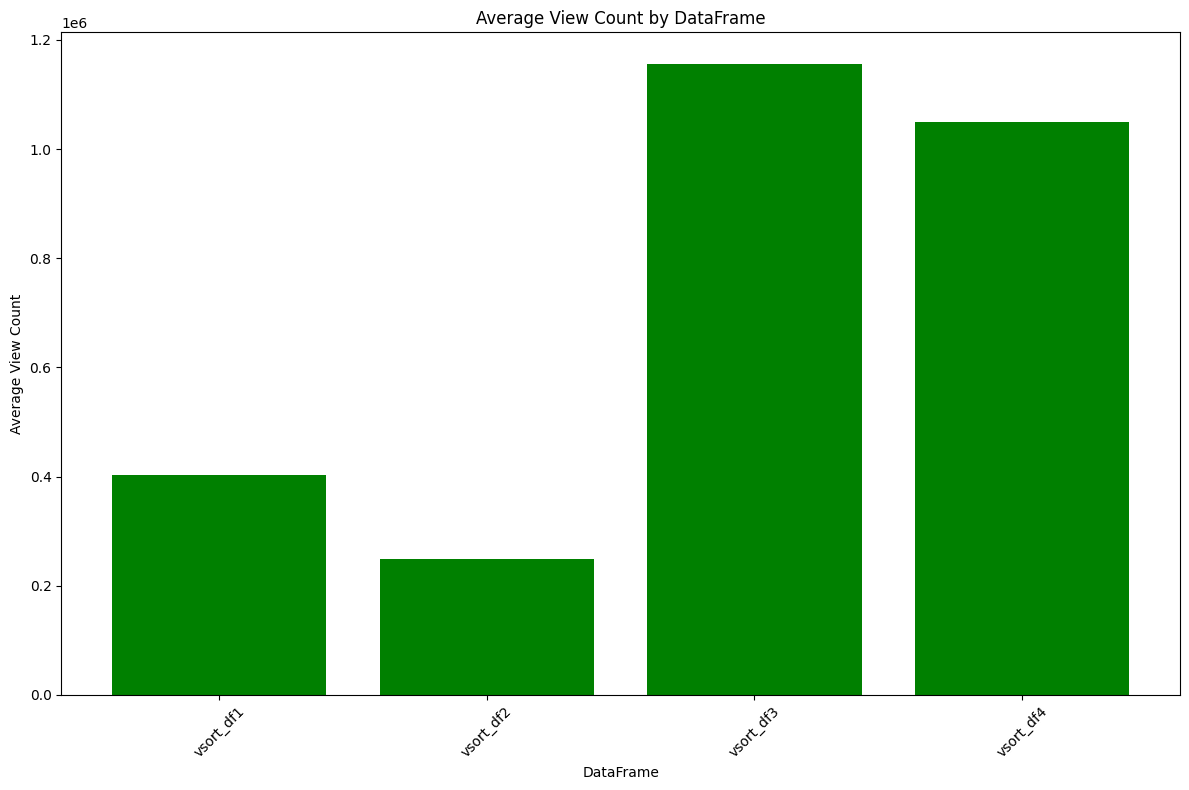

In [48]:
dataframes = [vsort_df1, vsort_df2, vsort_df3, vsort_df4]
names = ['vsort_df1', 'vsort_df2', 'vsort_df3', 'vsort_df4']

# 평균값 계산 및 저장
results = {'DataFrame': [], 'Mean': []}

for df, name in zip(dataframes, names):
    mean_value = df['view_count'].mean()
    
    results['DataFrame'].append(name)
    results['Mean'].append(mean_value)

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))

# 막대 그래프 그리기
plt.bar(results_df['DataFrame'], results_df['Mean'], color='green')

# 제목과 레이블 추가
plt.title('Average View Count by DataFrame')
plt.xlabel('DataFrame')
plt.ylabel('Average View Count')

# plt.savefig('채널별_평균.png')

# 그래프 출력
plt.xticks(rotation=45)  # x축 레이블이 겹치지 않도록 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

### 채널별 box plot

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_5820\129342692.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=vsort_df1_no_outlier, y='view_count', palette='coolwarm')


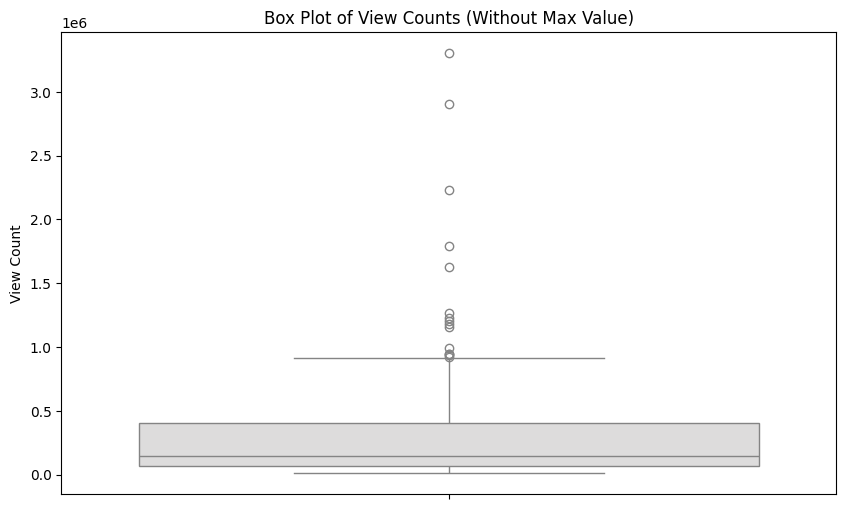

In [53]:
# play 채널A
# 가장 큰 'view_count' 값 찾기
max_view_count = vsort_df1['view_count'].max()

# 가장 큰 'view_count' 값을 가진 행 제거
vsort_df1_no_outlier = vsort_df1[vsort_df1['view_count'] != max_view_count]

# box plot 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
sns.boxplot(data=vsort_df1_no_outlier, y='view_count', palette='coolwarm')

# 제목과 레이블 추가
plt.title('Box Plot of View Counts (Without Max Value)')
plt.ylabel('View Count')

# plt.savefig('plat 채널 A boxplot')

# 그래프 출력
plt.show()

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_5820\2436780027.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=vsort_df2, y='view_count', palette='coolwarm')


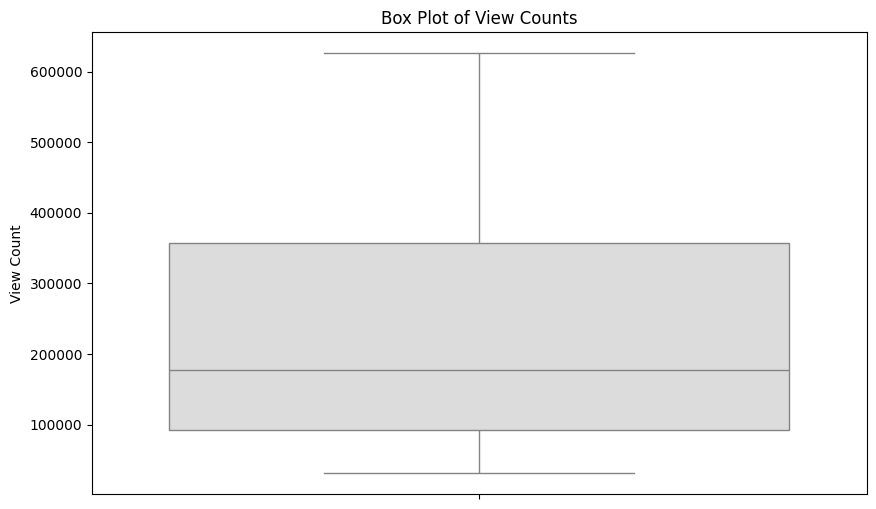

In [55]:
# 채널아하: 채널A Health & Asset
# box plot 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
sns.boxplot(data=vsort_df2, y='view_count', palette='coolwarm')

# 제목과 레이블 추가
plt.title('Box Plot of View Counts')
plt.ylabel('View Count')
# plt.savefig('채널아하boxplot')
# 그래프 출력
plt.show()

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_5820\3349707444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=vsort_df3, y='view_count', palette='coolwarm')


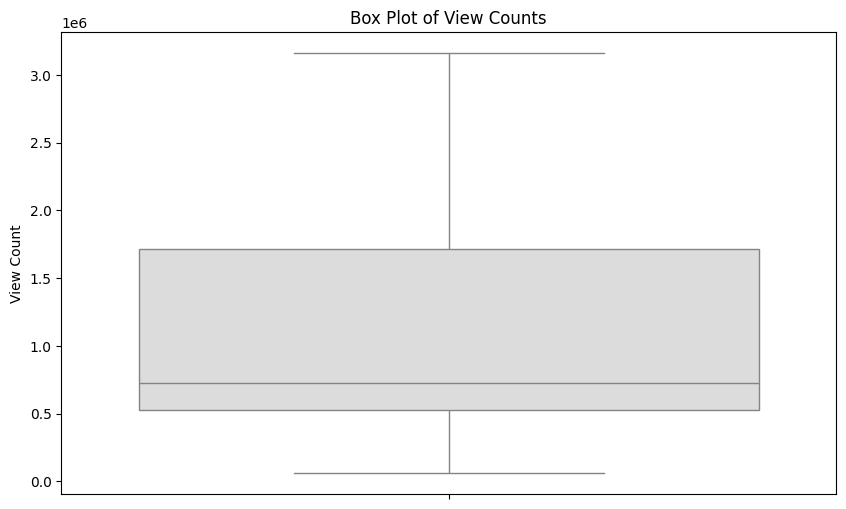

In [57]:
# 채널에이드: 채널A Drama & Enjoy
# box plot 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
sns.boxplot(data=vsort_df3, y='view_count', palette='coolwarm')

# 제목과 레이블 추가
plt.title('Box Plot of View Counts')
plt.ylabel('View Count')
# plt.savefig('채널에이드boxplot')
# 그래프 출력
plt.show()

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_5820\3192306398.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=vsort_df4, y='view_count', palette='coolwarm')


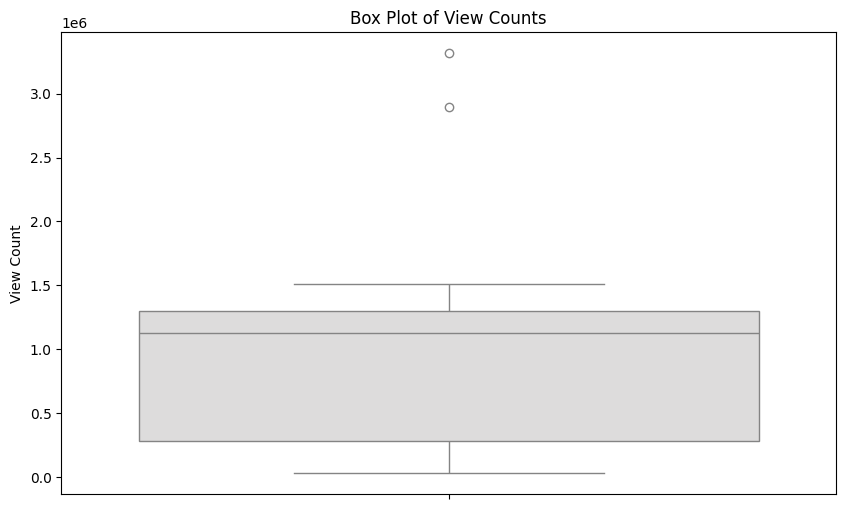

In [59]:
# 채널A WORLD
# box plot 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
sns.boxplot(data=vsort_df4, y='view_count', palette='coolwarm')

# 제목과 레이블 추가
plt.title('Box Plot of View Counts')
plt.ylabel('View Count')
# plt.savefig('채널A WORLDboxplot')
# 그래프 출력
plt.show()